# CHALLENGE NO 3
## CARGO LOADING OPTIMISATION

### BACKGROUND
To be able to deliver more sustainable transport solutions to our customers, Scania is focusing to optimise cargo usage.

This problem challenges you to maximise the value of cargo when loading a Scania truck. You are provided with a container of limited weight capacity and a collection of items with different values and weights. You have only one of each item to choose from. Your task is to maximise the value of the cargo without exceeding its total capacity.

### DATA
Cargo weight limit: 10000 kg
Data file: List of 100 items. Each line contains value and weight download loadingdata.txt

### ANSWER
The correct answer is the maximum value of the cargo without exceeding the total weight capacity

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
raw = pd.read_csv('loadingdata.txt', sep=' ', header=None)

In [4]:
raw.columns = ['value', 'weight']
raw.head(50)

,value,weight
0,336,342
1,1629,1514
2,697,696
3,1269,1433
4,1613,1762
5,36,40
6,1737,1635
7,473,442
8,1856,1899
9,2055,1960


In [5]:
raw.describe()

,value,weight
count,100.000000,100.000000
mean,1075.870000,1078.600000
std,612.397617,608.936281
min,2.000000,3.000000
25%,502.500000,507.750000
50%,1158.500000,1213.000000
75%,1606.250000,1599.000000
max,2114.000000,1972.000000


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
value     100 non-null int64
weight    100 non-null int64
dtypes: int64(2)
memory usage: 1.7 KB


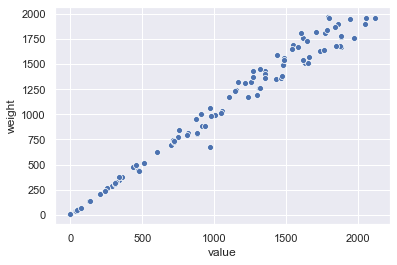

In [7]:
sns.scatterplot(x=raw['value'], y=raw['weight'])

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
reg = LinearRegression()

In [10]:
X = raw.iloc[:, :-1].values
y = raw.iloc[:,:1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
pred = reg.predict(X_test)

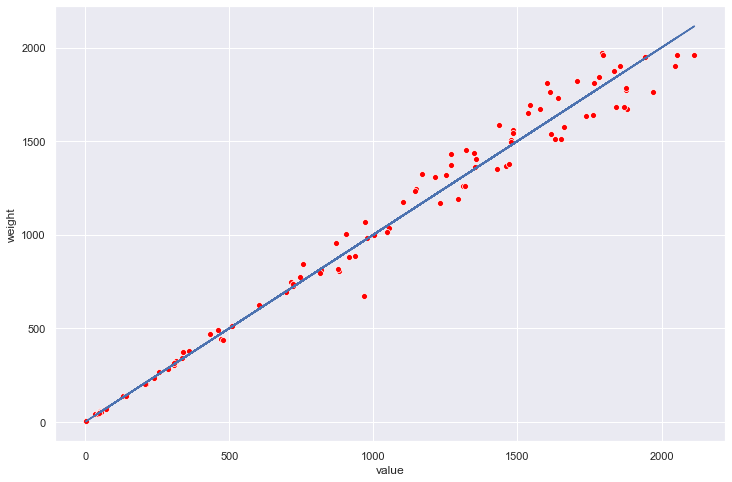

In [93]:
# plt.scatter(X_train, y_train, color='red')
plt.figure(figsize=(12,8))
sns.scatterplot(x=raw['value'], y=raw['weight'], color='red')
plt.plot(X_train, reg.predict(X_train))

In [94]:
raw['weight'].sum()

107860

In [95]:
df_sorted = raw.sort_values(by=['value'], ascending=False)
df_sorted

,value,weight
62,2114,1958
9,2055,1960
51,2046,1902
34,1970,1764
83,1944,1952
...,...,...
43,51,52
89,49,49
69,43,40
5,36,40


In [96]:
df_sorted[:6].sum()

value     12009
weight    11206
dtype: int64

In [97]:
def check_if_below(weight):
    w = np.array([weight]) 
    w = w.reshape(1, -1)
    return (reg.predict(w) < weight)[0][0]

In [98]:
tests = df_sorted['weight'].apply(check_if_below)

In [99]:
filtered = df_sorted[tests]

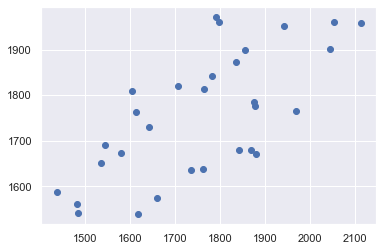

In [100]:
plt.scatter(filtered['value'], filtered['weight'])

In [101]:
X2 = raw.iloc[:, :-1].values
y2 = raw.iloc[:,:1].values


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=42)

In [102]:
reg2 = LinearRegression()

In [103]:
reg2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
pred2 = reg2.predict(X_test2)

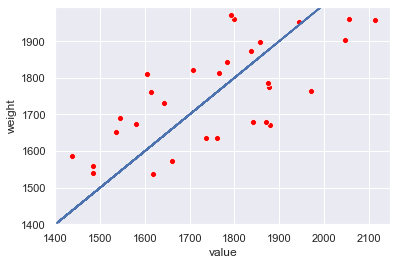

In [111]:
sns.scatterplot(x=filtered['value'], y=filtered['weight'], color='red')
plt.ylim(ymin=1400)
plt.xlim(xmin=1400)
plt.plot(X_train2, reg2.predict(X_train2))

In [109]:
def check_if_below2(weight):
    w = np.array([weight]) 
    w = w.reshape(1, -1)
    return (reg2.predict(w) < weight)[0][0]

In [120]:
f = filtered
f =f[f['value'] > 1900]

In [121]:
f

,value,weight
62,2114,1958
9,2055,1960
51,2046,1902
34,1970,1764
83,1944,1952
